In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [46]:
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [24]:
glimpse(players)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


In [25]:
glimpse(sessions)

Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


In [47]:
sessions <- sessions |>
    mutate(start_time = dmy_hm(start_time))
sessions <- sessions |>
    mutate(hour = hour(start_time), day_of_week = wday(start_time))
sessions <- drop_na(sessions, end_time)

sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time,hour,day_of_week
<chr>,<dttm>,<chr>,<dbl>,<dbl>,<int>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,30/06/2024 18:24,1.71977e+12,1.71977e+12,18,1
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,17/06/2024 23:46,1.71867e+12,1.71867e+12,23,2
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,25/07/2024 17:57,1.72193e+12,1.72193e+12,17,5
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,25/07/2024 03:58,1.72188e+12,1.72188e+12,3,5
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,25/05/2024 16:12,1.71665e+12,1.71665e+12,16,7
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,23/06/2024 17:10,1.71916e+12,1.71916e+12,15,1
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 07:12:00,15/04/2024 07:21,1.71317e+12,1.71317e+12,7,2
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2024-09-21 02:13:00,21/09/2024 02:30,1.72688e+12,1.72689e+12,2,7
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2024-06-21 02:31:00,21/06/2024 02:49,1.71894e+12,1.71894e+12,2,6


In [48]:
hourly_players <- sessions |>
    group_by(hour) |>
    summarise(player_count = n())

hourly_players

hour,player_count
<int>,<int>
0,128
1,79
2,152
3,131
4,150
5,88
6,74
7,56
8,12


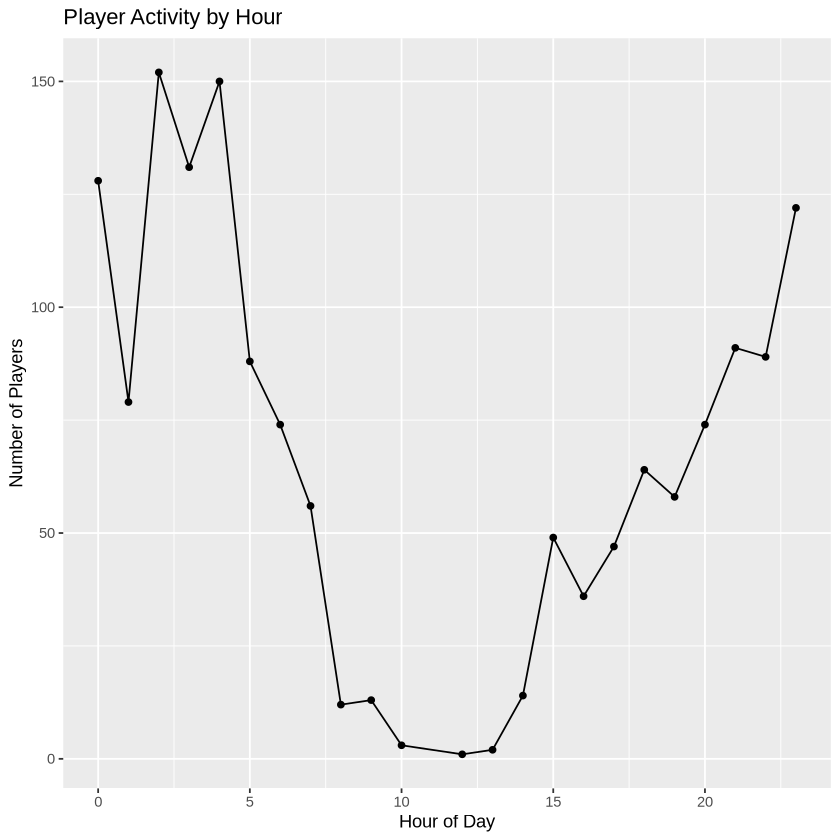

In [51]:
ggplot(hourly_players, aes(x = hour, y = player_count)) +
    geom_line() +
    geom_point() +
    labs(title = "Player Activity by Hour", 
         x = "Hour of Day", 
         y = "Number of Players")

day_of_week,player_count
<dbl>,<int>
1,248
2,207
3,203
4,210
5,223
6,181
7,261


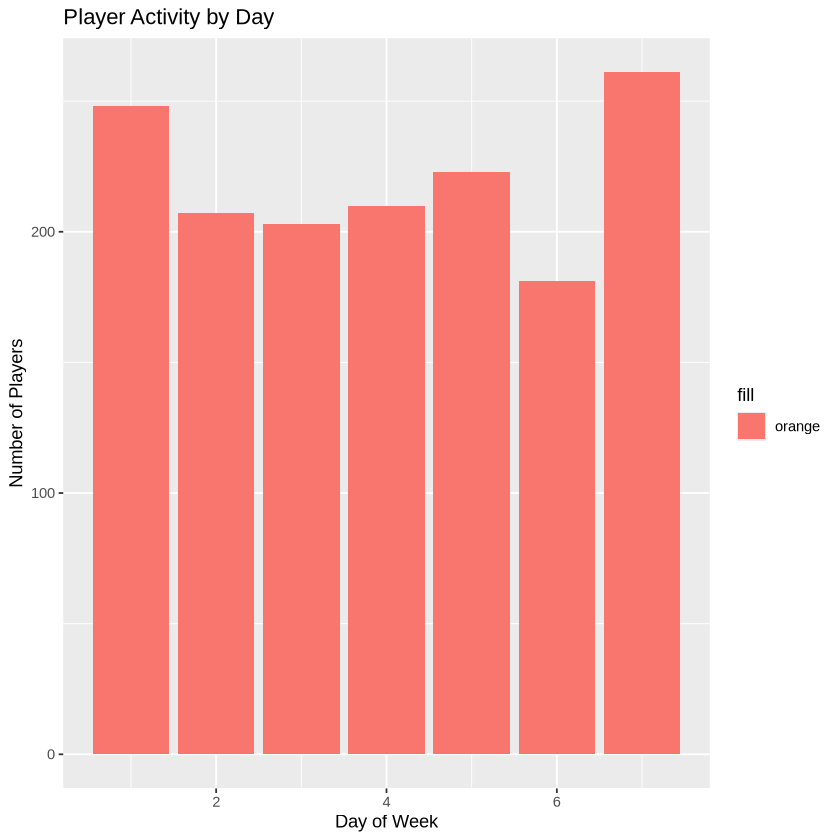

In [58]:
daily_players <- sessions %>%
  group_by(day_of_week) %>%
  summarise(player_count = n())

daily_players

ggplot(daily_players, aes(x = day_of_week, y = player_count, fill = "orange")) +
  geom_bar(stat = "identity") +
  labs(title = "Player Activity by Day",
       x = "Day of Week",
       y = "Number of Players")